In [1]:
#Import libraries
import sys
import os
import nltk
nltk.download('stopwords')
import pandas as pd
from sklearn.neural_network import MLPClassifier
from ExtractContent import GetTrainingClassification, ExtractBodyFromDir, BuildDataSet, Sanitize_Data, save_results, printfile, progressbarTime, remove_extra_fields
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import seaborn as sns 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prettyallo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prettyallo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/prettyallo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
    data_dir_path = "DataSet" + os.path.sep 
    tr_email_path = data_dir_path + "spam-mail.tr.label"
    tr_extract_dir_path = data_dir_path + "TR"
    tt_extract_dir_path = data_dir_path + "TT"
    tr_content_dir_path = data_dir_path + "TRemailSet"
    tt_content_dir_path = data_dir_path + "TTemailSet"
    tr_csv_path = data_dir_path + "TrainningSet.csv"
    tt_csv_path = "DataSet" + os.path.sep + "TestingSet.csv"

In [3]:
    #Loads the targets
    emailTargets = GetTrainingClassification(tr_email_path)
    
    print("\Loading testing and training emails:")
    # generate training dataset
    ExtractBodyFromDir(tr_extract_dir_path, tr_content_dir_path)
    BuildDataSet(tr_content_dir_path, tr_content_dir_path,tr_csv_path, emailTargets)

\Loading testing and training emails:
 Loading emails into a DataSet [ ---------------------------------------------------]


In [5]:
    # Chargement des dataset ".csv"
    TrainDataSet = pd.read_csv(tr_csv_path, sep=';',names=('position', 'Subject', 'Content', 'SPAM')).sort_values('position')
    TestDataSet = pd.read_csv(tt_csv_path, sep=';',names=('position', 'Subject', 'Content')).sort_values('position')

In [6]:
TrainDataSet

,position,Subject,Content,SPAM
280,1,One of a kind Money maker! Try it for free!,"! Content-Type: text/html\tcharset=""iso-8859-1...",0
122,2,link to my webcam you wanted,Wanna see sexually curious teens playing wit...,0
36,3,Re: How to manage multiple Internet connections?,? Content-Type: text/plain charset=us-asciiCon...,1
443,4,[SPAM] Give her 3 hour rodeo,"o Enhance your desire, pleasure and performanc...",0
363,5,Best Price on the netf5f8m1,1 (suddenlysusan@Stoolmail.zzn.com) on Tuesda...,0
...,...,...,...,...
1765,2496,"[SOLVED] Re: NVidia MCP61, no sound...",". Dear Anand,=20I tried your configuration fil...",1
1882,2497,Re: PDF grief - was Re: Flash is open?,? Content-Type: text/plain charset=iso-8859-1C...,1
941,2498,RE: [ILUG] What HOWTOs for SOHO system,"m Hi Dermot, if have a look at one of the dist...",1
821,2499,[Spambayes] hammie.py vs. GBayes.py,y Guido> Therefore I propose to nuke GBaye...,1


In [7]:
TestDataSet

,position,Subject,Content
333,1,Re: Apple Sauced...again,"n At 1:16 AM -0400 on 10/3/02, Gary Lawrence M..."
460,2,"Re: RPMs %post, %postun etc",c Have you tried rebuilding your package on a ...
411,3,Re: (no subject),) I've picked up these patches and will submit...
214,4,"Enter now, hibody, 75% off","f <!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0..."
162,5,[SPAM] Summer time,e Content-Type: multipart/alternative\tboundar...
...,...,...,...
1186,1823,"On The Way to Telluride, On My Way Back to the...","d On The Way to Telluride, On My Way Back to t..."
1341,1824,[SPAM] Is that you? Found u by surname,e <html><head> <title>C+D News Bulletin...
1400,1825,For hibody. Get 70% off today. commissioned sy...,"l <!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0..."
1291,1826,Aldebarans Spring Special Offer,r Content-Type: text/plain charset=ISO-8859-1C...


In [8]:
    # Vérifie et supprime les doublons ----------------------- ON GARDE ?
    #TrainDataSet.drop_duplicates(inplace=True)

In [9]:
print("TrainDataSet =", TrainDataSet.shape)
print("TestDataSet  =", TestDataSet.shape)

TrainDataSet = (2500, 4)
TestDataSet  = (1827, 3)


In [10]:
#Afficher le nombre de données manquantes (NAN, NaN, na) pour chaque colonne du TrainDataSet
print( TrainDataSet.isnull().sum() )

#Afficher le nombre de données manquantes (NAN, NaN, na) pour chaque colonne du TestDataSet
print(TestDataSet.isnull().sum() )

position    0
Subject     2
Content     2
SPAM        0
dtype: int64
position    0
Subject     2
Content     2
dtype: int64


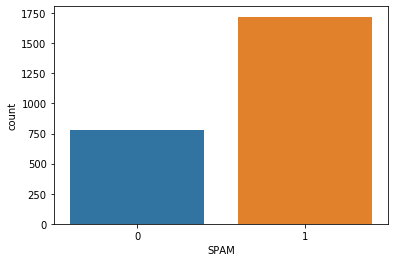

In [11]:
#Afficher le graphe du nombre de mail Spam et Non Spam
sns.countplot(TrainDataSet.SPAM)

In [12]:
#Statistique des SPAM et Non SPAM 
TrainDataSet.groupby('SPAM').describe()

position                                                             
        count         mean         std  min    25%     50%     75%     max
SPAM                                                                      
0       779.0  1231.064185  745.672856  1.0  574.0  1198.0  1905.0  2500.0
1      1721.0  1259.297501  710.824066  3.0  656.0  1264.0  1860.0  2499.0

In [13]:
Sanitize_Data(TestDataSet) #sanitize and collect the word number and the char number
Sanitize_Data(TrainDataSet)

  Traitement DataSet [ -]
  Traitement DataSet [ -]


In [14]:
TrainDataSet

,position,Subject,Content,SPAM,Text_clain,wordNum,messageLength
280,1,One of a kind Money maker! Try it for free!,"! Content-Type: text/html\tcharset=""iso-8859-1...",0,content type text html charset iso 8859 1 cont...,691,2522
122,2,link to my webcam you wanted,Wanna see sexually curious teens playing wit...,0,wanna see sexual curious teen play http www si...,51,188
36,3,Re: How to manage multiple Internet connections?,? Content-Type: text/plain charset=us-asciiCon...,1,content type text plain charset us asciicont d...,435,1450
443,4,[SPAM] Give her 3 hour rodeo,"o Enhance your desire, pleasure and performanc...",0,enhanc desir pleasur perform 100 guarante see ...,21,86
363,5,Best Price on the netf5f8m1,1 (suddenlysusan@Stoolmail.zzn.com) on Tuesda...,0,1 suddenlysusan stoolmail zzn com tuesday juli...,83,295
...,...,...,...,...,...,...,...
1765,2496,"[SOLVED] Re: NVidia MCP61, no sound...",". Dear Anand,=20I tried your configuration fil...",1,dear anand 20i tri configur file noth chang ki...,1758,8749
1882,2497,Re: PDF grief - was Re: Flash is open?,? Content-Type: text/plain charset=iso-8859-1C...,1,content type text plain charset iso 8859 1cont...,278,1223
941,2498,RE: [ILUG] What HOWTOs for SOHO system,"m Hi Dermot, if have a look at one of the dist...",1,hi dermot look one dist like www smoothwal org...,269,999
821,2499,[Spambayes] hammie.py vs. GBayes.py,y Guido> Therefore I propose to nuke GBaye...,1,guido therefor propos nuke gbay py ad u featur...,49,151


In [15]:
    # separe le 'target' et les 'features' du DataSet de Trainning
    y = pd.DataFrame(TrainDataSet.SPAM) 
    x = TrainDataSet.drop(['SPAM'], axis=1)

In [16]:
    print("Moyenne Nomre de mots du DataSet d'entrainement :", int(TrainDataSet['wordNum'].mean()))
    print("Moyenne Nomre de mots du DataSet d'entrainement :", int(TestDataSet['wordNum'].mean()))
    max_feature = max(int(TrainDataSet['wordNum'].mean()), int(TestDataSet['wordNum'].mean()))

Moyenne Nomre de mots du DataSet d'entrainement : 417
Moyenne Nomre de mots du DataSet d'entrainement : 446


In [17]:
    # creation des variable d'entrainement et de validation
    x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=0)

In [18]:
x_train

,position,Subject,Content,Text_clain,wordNum,messageLength
1098,287,Re: Apt repository authentication: its time,e Hi.Brian Fahrlander <kilroy@kamakiriad.com> ...,e hi brian fahrland kilroy kamakiriad com wrot...,83,355
283,1496,Re: Hansons Sept 11 message in the National Re...,w The usual crud. Why do morons ranting and b...,w usual crud moron rant beat chest thenat revi...,20,71
1760,41,Re: [Razor-users] Problem with Razor 2.14 and ...,"1 On Thu, Sep 05, 2002 at 10:12:59PM -0400, Le...",1 thu sep 05 2002 10 12 59pm 0400 leland woodb...,158,612
2042,1107,Re: [zzzzteana] The Cafe Forteana is back onli...,! >That Goddess Chick wrote:>>>> >Thanks Fel....,goddess chick wrote thank fel got scanner phot...,202,828
1158,1380,Re: Apt repository authentication: its time,"e Once upon a time, Brian wrote :> OK, it...",e upon time brian wrote ok time work pgp secur...,244,896
...,...,...,...,...,...,...
1210,1034,Re: Ximian apt repos?,? On 21 Jul 2002 14:20:42 +1200Mark Derricutt ...,21 jul 2002 14 20 42 1200mark derricutt mark t...,291,1164
414,1732,Updating JRE in Lenny,y -----BEGIN PGP SIGNED MESSAGE-----Hash: SHA1...,begin pgp sign messag hash sha1a websit want u...,256,1164
2018,764,Attn:Targeted email addresses,s Targeted email marketing works! There's no ...,target email market work way around medium let...,84,297
1958,836,Re: [TexLive] This math formula work a few mon...,e You seem to have configuration files of olde...,e seem configur file older texliv packag yours...,88,402


In [19]:
x_val

,position,Subject,Content,Text_clain,wordNum,messageLength
1883,54,=?iso-8859-1?B?W1NQQU1dIA==?= =?iso-8859-1?B?c...,"= Content-Type: text/plain\tcharset=""iso-8859-...",content type text plain charset iso 8859 1 con...,239,710
2477,2392,[use Perl] Stories for 2002-10-10,0 use Perl Daily NewsletterIn this issue: *...,0 use perl daili newsletterin issu tpf octob n...,143,612
962,2311,Re: [ILUG] cdrecord + 2.4.19 = hard-lock,"k On 0020 +0100 %{!Sat, Aug 10, 2002 at 12:11:...",k 0020 0100 sat aug 10 2002 12 11 50pm 0100 fr...,147,558
1715,729,[ILUG] Openssh FYI.,. http://docs.freebsd.org/cgi/getmsg.cgi?fetch...,http doc freebsd org cgi getmsg cgi fetch 3946...,55,289
1845,851,Re: Gnome 2.30 icons (was: Has Iceweasel adopt...,") On 2010-05-06, Tixy <debianuser@tixy.myzen.c...",2010 05 06 tixi debianus tixi myzen co uk wrot...,183,691
...,...,...,...,...,...,...
664,1811,NYTimes.com Article: Vast Detail on Towers Col...,d This article from NYTimes.com has been sent ...,articl nytim com sent khare alumni caltech edu...,1591,6734
1740,2331,User hibody ordering today - getting 80% off Ief,"f <!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...",f doctyp html public w3c dtd xhtml 1 0 transit...,1037,4691
748,685,Bad Credit Breakthrough!!! 6465,5 <html><HEAD><TITLE>creditfix</TITLE> </HEAD>...,5 html head titl creditfix titl head bodi bgco...,400,1723
2046,1675,Re: [ILUG] [OT] Dell machine giving me hassle.,". I'm not familiar with Dell Dimension XPS, an...",familiar dell dimens xps honest familiarwith b...,131,489


In [20]:
    # Vectorisation de comptage
    # Il s'agit de compter le nombre d'occurrences de chaque mot dans le texte donné.
    # --Training data
    vectorize_Train = CountVectorizer(max_features=max_feature)
    temp_train = vectorize_Train.fit_transform(x_train['Text_clain']).toarray()
    temp_val = vectorize_Train.transform(x_val['Text_clain']).toarray()

In [21]:
TestDataSet

,position,Subject,Content,Text_clain,wordNum,messageLength
333,1,Re: Apple Sauced...again,"n At 1:16 AM -0400 on 10/3/02, Gary Lawrence M...",n 1 16 0400 10 3 02 gari lawrenc murphi wrote ...,155,541
460,2,"Re: RPMs %post, %postun etc",c Have you tried rebuilding your package on a ...,c tri rebuild packag system stock orno rpmmacr...,143,537
411,3,Re: (no subject),) I've picked up these patches and will submit...,pick patch submit cvs eventu bug worth fix ple...,324,1114
214,4,"Enter now, hibody, 75% off","f <!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...",f doctyp html public w3c dtd xhtml 1 0 transit...,1171,5077
162,5,[SPAM] Summer time,e Content-Type: multipart/alternative\tboundar...,e content type multipart altern boundari nextp...,363,2388
...,...,...,...,...,...,...
1186,1823,"On The Way to Telluride, On My Way Back to the...","d On The Way to Telluride, On My Way Back to t...",way tellurid way back world8 29 02dear friend ...,2003,5672
1341,1824,[SPAM] Is that you? Found u by surname,e <html><head> <title>C+D News Bulletin...,e html head titl c news bulletin titl meta con...,398,1926
1400,1825,For hibody. Get 70% off today. commissioned sy...,"l <!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0...",l doctyp html public w3c dtd xhtml 1 0 transit...,2947,12469
1291,1826,Aldebarans Spring Special Offer,r Content-Type: text/plain charset=ISO-8859-1C...,r content type text plain charset iso 8859 1co...,110,969


In [22]:
TrainDataSet

,position,Subject,Content,SPAM,Text_clain,wordNum,messageLength
280,1,One of a kind Money maker! Try it for free!,"! Content-Type: text/html\tcharset=""iso-8859-1...",0,content type text html charset iso 8859 1 cont...,691,2522
122,2,link to my webcam you wanted,Wanna see sexually curious teens playing wit...,0,wanna see sexual curious teen play http www si...,51,188
36,3,Re: How to manage multiple Internet connections?,? Content-Type: text/plain charset=us-asciiCon...,1,content type text plain charset us asciicont d...,435,1450
443,4,[SPAM] Give her 3 hour rodeo,"o Enhance your desire, pleasure and performanc...",0,enhanc desir pleasur perform 100 guarante see ...,21,86
363,5,Best Price on the netf5f8m1,1 (suddenlysusan@Stoolmail.zzn.com) on Tuesda...,0,1 suddenlysusan stoolmail zzn com tuesday juli...,83,295
...,...,...,...,...,...,...,...
1765,2496,"[SOLVED] Re: NVidia MCP61, no sound...",". Dear Anand,=20I tried your configuration fil...",1,dear anand 20i tri configur file noth chang ki...,1758,8749
1882,2497,Re: PDF grief - was Re: Flash is open?,? Content-Type: text/plain charset=iso-8859-1C...,1,content type text plain charset iso 8859 1cont...,278,1223
941,2498,RE: [ILUG] What HOWTOs for SOHO system,"m Hi Dermot, if have a look at one of the dist...",1,hi dermot look one dist like www smoothwal org...,269,999
821,2499,[Spambayes] hammie.py vs. GBayes.py,y Guido> Therefore I propose to nuke GBaye...,1,guido therefor propos nuke gbay py ad u featur...,49,151


In [23]:
    # tfidf : utiliser pour determiner à quel point un mot est important pour un texte dans un groupe de texte.
    # il est calculé en multipliant la fréquence d'un mot et la fréquence inverse du document
    # (la fréquence d'un mot, calculée par log (nombre de texte / nombre de texte contenant le mot)) du mot dans un groupe de texte.
    #-- pour le les donne d'entrainement
    tf_train = TfidfTransformer()

    temp_train = tf_train.fit_transform(temp_train)
    temp_val = tf_train.transform(temp_val)

In [24]:
    # merging temp datafram avec le dataframe original

    #-- pour les donne d'entrainement
    temp_train = pd.DataFrame(temp_train.toarray(), index=x_train.index)
    temp_val = pd.DataFrame(temp_val.toarray(), index=x_val.index)
    x_train = pd.concat([x_train, temp_train], axis=1, sort=False)
    x_val = pd.concat([x_val, temp_val], axis=1, sort=False)


In [25]:
remove_extra_fields(x_train)

In [26]:
remove_extra_fields(x_val)

In [27]:
x_train.head()

,wordNum,messageLength,0,1,2,3,4,5,6,7,...,436,437,438,439,440,441,442,443,444,445
1098,83,355,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.084536,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
283,20,71,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1760,158,612,0.0,0.0,0.0,0.0,0.0,0.116554,0.0,0.0,...,0.000000,0.0,0.071895,0.061738,0.0,0.0,0.000000,0.0,0.0,0.0
2042,202,828,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.072616,0.0,0.063300,0.217430,0.0,0.0,0.485996,0.0,0.0,0.0
1158,244,896,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.047311,0.0,0.041241,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0


In [28]:
    names = ["K_Nearest_Neighbors", "Decision_Tree", "Random_Forest", "Logistic_Regression", "SGD_Classifier", "Naive_Bayes", "SVM_Linear","MLPClassifier"]
    Y_preds = {}

    classifiers = [
        KNeighborsClassifier(),
        DecisionTreeClassifier(random_state=0),
        RandomForestClassifier(),
        LogisticRegression(),
        SGDClassifier(max_iter=100),
        MultinomialNB(),
        SVC(kernel='linear'),
        MLPClassifier()
    ]

    models = zip(names, classifiers)
    score = {}
    j=0

    print("\nTrainning All Algoritheme:")
    numm = progressbarTime("Trainning All Models")
    for name, model in models:
        if (j % (len(classifiers) / numm)) == 0:
            sys.stdout.write("-"*len(classifiers))
            sys.stdout.flush()

        model.fit(x_train, y_train)
        y_preds = model.predict(x_val)
        Y_preds[name] = y_preds
        score[name] = [accuracy_score(y_val, y_preds), 0, 0]
    #     print("Precision: {:.2f}%".format(100 * precision_score(y_val, y_preds)))
    #     print("Recall: {:.2f}%".format(100 * recall_score(y_val, y_preds)))
    #     print("Confusion Matrix:\n")
    #     confusion_m = confusion_matrix(y_val, y_preds)
    #     print(confusion_m)

    sys.stdout.write("]\n")


Trainning All Algoritheme:
Trainning All Models [ ----------------------------------------------------------------]


In [29]:
score

{'K_Nearest_Neighbors': [0.776, 0, 0],
 'Decision_Tree': [0.954, 0, 0],
 'Random_Forest': [0.966, 0, 0],
 'Logistic_Regression': [0.976, 0, 0],
 'SGD_Classifier': [0.764, 0, 0],
 'Naive_Bayes': [0.88, 0, 0],
 'SVM_Linear': [0.934, 0, 0],
 'MLPClassifier': [0.966, 0, 0]}

In [30]:
save_results(names, score)
printfile()







        Table: Performance comparison and cross validation: Training set   

+--------------------------------------------------------------+
|ALGORITHME           |      evaluation  metrics               | 
+--------------------------------------------------------------+
|                     |   accuracy | Train_Error |   Val_Error |
|##############################################################|
|  K_Nearest_Neighbors| 77.60 %    | 0.00 %    | 0.00 %    |
+--------------------------------------------------------------+           
|        Decision_Tree| 95.40 %    | 0.00 %    | 0.00 %    |
+--------------------------------------------------------------+           
|        Random_Forest| 96.60 %    | 0.00 %    | 0.00 %    |
+--------------------------------------------------------------+           
|  Logistic_Regression| 97.60 %    | 0.00 %    | 0.00 %    |
+--------------------------------------------------------------+           
|       SGD_Classifier| 76.40 %    | 0.00 %